# 电影数据分析

## 一、提出问题

## 二、理解问题

## 三、数据清洗

## 四、分析问题

In [88]:
#导入模块
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
from pylab import*
mpl.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False#解决绘图中文乱码的问题

In [89]:
credits_file='C:/Users/chen jia ni/Desktop/tmdb_5000_credits.csv'
movies_file='C:/Users/chen jia ni/Desktop/tmdb_5000_movies.csv'
credits=pd.read_csv(credits_file,encoding='utf-8')
movies=pd.read_csv(movies_file,parse_dates=['release_date'])
print("credits:",credits.shape,"movies:",movies.shape)

credits: (4803, 4) movies: (4803, 20)


In [90]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [91]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [92]:
del credits['title']
full=pd.concat([credits,movies],axis=1)
print("合并后数据集:",full.shape)

合并后数据集: (4803, 23)


In [93]:
full=full[['id','title','vote_average','production_companies','genres',
     'release_date','keywords','runtime','budget','revenue','vote_count','popularity']]
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
id                      4803 non-null int64
title                   4803 non-null object
vote_average            4803 non-null float64
production_companies    4803 non-null object
genres                  4803 non-null object
release_date            4802 non-null datetime64[ns]
keywords                4803 non-null object
runtime                 4801 non-null float64
budget                  4803 non-null int64
revenue                 4803 non-null int64
vote_count              4803 non-null int64
popularity              4803 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 450.4+ KB


In [94]:
full.loc[full['release_date'].isnull(),'title']

4553    America Is Still the Place
Name: title, dtype: object

In [95]:
full['release_date']=full['release_date'].fillna('2014-06-01')
full.loc[4553,'release_date']

'2014-06-01'

In [96]:
full.loc[full['runtime'].isnull(),'title']

2656    Chiamatemi Francesco - Il Papa della gente
4140                   To Be Frank, Sinatra at 100
Name: title, dtype: object

In [97]:
full['runtime']=full['runtime'].fillna(full['runtime'].mean())

In [98]:
full.loc[2656,'runtime']

106.87585919600083

In [99]:
full.loc[4140,'runtime']

106.87585919600083

In [100]:
full['release_year']=pd.to_datetime(full['release_date'],format='%Y-%m-%d').dt.year
full['release_year'].head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_year, dtype: int64

In [101]:
def getname(x):
    a=[]
    for i in x:
        a.append(i['name'])
    return ','.join(a)

In [102]:
full['genres']=full['genres'].apply(json.loads)

In [103]:
full['genres']

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
5       [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...
6       [{'id': 16, 'name': 'Animation'}, {'id': 10751...
7       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
8       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
9       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
10      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
11      [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...
12      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
13      [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
14      [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
15      [{'id': 12, 'name': 'Adventure'}, {'id': 10751...
16      [{'id': 878, 'name': 'Science Fiction'}, {'id'...
17      [{'id'

In [104]:
full['genres']=full['genres'].apply(getname)
full['genres']

0        Action,Adventure,Fantasy,Science Fiction
1                        Adventure,Fantasy,Action
2                          Action,Adventure,Crime
3                     Action,Crime,Drama,Thriller
4                Action,Adventure,Science Fiction
5                        Fantasy,Action,Adventure
6                                Animation,Family
7                Action,Adventure,Science Fiction
8                        Adventure,Fantasy,Family
9                        Action,Adventure,Fantasy
10       Adventure,Fantasy,Action,Science Fiction
11                Adventure,Action,Thriller,Crime
12                       Adventure,Fantasy,Action
13                       Action,Adventure,Western
14       Action,Adventure,Fantasy,Science Fiction
15                       Adventure,Family,Fantasy
16               Science Fiction,Action,Adventure
17                       Adventure,Action,Fantasy
18                  Action,Comedy,Science Fiction
19                       Action,Adventure,Fantasy


In [105]:
full['production_companies']=full['production_companies'].apply(json.loads)
full['production_companies']=full['production_companies'].apply(getname)

In [106]:
full['keywords']=full['keywords'].apply(json.loads)
full['keywords']=full['keywords'].apply(getname)

In [107]:
genresList=set()
for s in full['genres'].str.split(','):
    genresList=set().union(s,genresList)
genresList

{'',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [108]:
genresList=list(genresList)
genresList

['',
 'Horror',
 'Animation',
 'Adventure',
 'Action',
 'Music',
 'Romance',
 'Documentary',
 'Comedy',
 'Foreign',
 'Science Fiction',
 'Crime',
 'Mystery',
 'Family',
 'War',
 'Thriller',
 'TV Movie',
 'History',
 'Fantasy',
 'Western',
 'Drama']

In [109]:
genresList.remove('')

In [110]:
genresList

['Horror',
 'Animation',
 'Adventure',
 'Action',
 'Music',
 'Romance',
 'Documentary',
 'Comedy',
 'Foreign',
 'Science Fiction',
 'Crime',
 'Mystery',
 'Family',
 'War',
 'Thriller',
 'TV Movie',
 'History',
 'Fantasy',
 'Western',
 'Drama']

In [111]:
genresDf=pd.DataFrame()

In [112]:
for genre in genresList:
    genresDf[genre]=full['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

In [113]:
genresDf

,Horror,Animation,Adventure,Action,Music,Romance,Documentary,Comedy,Foreign,Science Fiction,Crime,Mystery,Family,War,Thriller,TV Movie,History,Fantasy,Western,Drama
0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [114]:
genresDf['release_year']=full['release_year']
genresDf['release_year']

0       2009
1       2007
2       2015
3       2012
4       2012
5       2007
6       2010
7       2015
8       2009
9       2016
10      2006
11      2008
12      2006
13      2013
14      2013
15      2008
16      2012
17      2011
18      2012
19      2014
20      2012
21      2010
22      2013
23      2007
24      2005
25      1997
26      2016
27      2012
28      2015
29      2012
        ... 
4773    1994
4774    1971
4775    2002
4776    1997
4777    2002
4778    2009
4779    1990
4780    2015
4781    2013
4782    2003
4783    2015
4784    2005
4785    2014
4786    2009
4787    2011
4788    1972
4789    2004
4790    2000
4791    2007
4792    1997
4793    2004
4794    2012
4795    1995
4796    2004
4797    2005
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: release_year, Length: 4803, dtype: int64

In [115]:
genresDf.index=full['release_year']
genresDf

,Horror,Animation,Adventure,Action,Music,Romance,Documentary,Comedy,Foreign,Science Fiction,...,Mystery,Family,War,Thriller,TV Movie,History,Fantasy,Western,Drama,release_year
release_year,,,,,,,,,,,,,,,,,,,,,
2009,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2009
2007,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2007
2015,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015
2012,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,2012
2012,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2012
2007,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2007
2010,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2010
2015,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2015
2009,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2009


In [116]:
genresDf=genresDf.sort_index()

In [117]:
genresDf

,Horror,Animation,Adventure,Action,Music,Romance,Documentary,Comedy,Foreign,Science Fiction,...,Mystery,Family,War,Thriller,TV Movie,History,Fantasy,Western,Drama,release_year
release_year,,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1916
1925,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1925
1927,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1927
1929,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1929
1929,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1929
1930,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1930
1932,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1932
1933,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1933
1933,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1933


In [118]:
genresDf=genresDf.groupby('release_year').sum()
genresDf

,Horror,Animation,Adventure,Action,Music,Romance,Documentary,Comedy,Foreign,Science Fiction,Crime,Mystery,Family,War,Thriller,TV Movie,History,Fantasy,Western,Drama
release_year,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1925,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1927,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1929,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,2
1930,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1932,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1933,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0
1934,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1935,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
total=genresDf.sum().sort_values()
total

TV Movie              8
Foreign              34
Western              82
Documentary         110
War                 144
Music               185
History             197
Animation           234
Mystery             348
Fantasy             424
Family              513
Horror              519
Science Fiction     535
Crime               696
Adventure           790
Romance             894
Action             1154
Thriller           1274
Comedy             1722
Drama              2297
dtype: int64

In [120]:
total=total[-10:]
total

Family              513
Horror              519
Science Fiction     535
Crime               696
Adventure           790
Romance             894
Action             1154
Thriller           1274
Comedy             1722
Drama              2297
dtype: int64

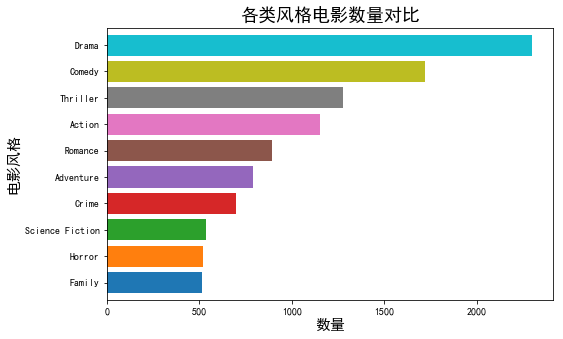

In [121]:
total.plot(kind='barh',figsize=(8,5),width=0.8)
plt.title('各类风格电影数量对比',fontsize=18)
plt.xlabel('数量',fontsize=15)
plt.ylabel('电影风格',fontsize=15)
plt.show()

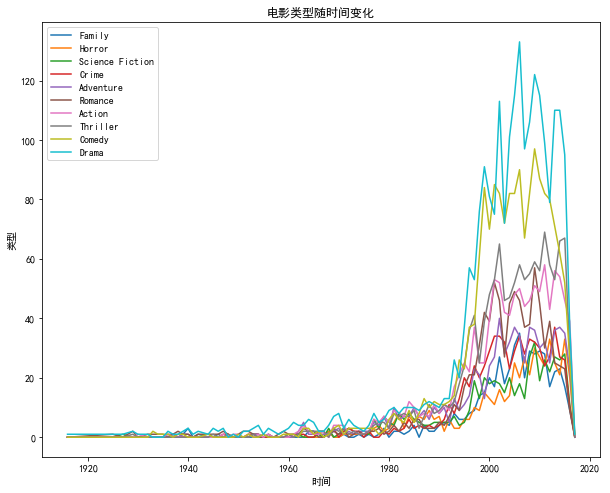

In [122]:
genresDf=genresDf[['Family','Horror','Science Fiction','Crime','Adventure','Romance','Action','Thriller','Comedy','Drama']]
genresDf.plot(figsize=(10,8))
plt.title('电影类型随时间变化')
xlabel("时间")
ylabel("类型")
plt.show()

In [123]:
corrDf=full.corr()
corrDf

,id,vote_average,runtime,budget,revenue,vote_count,popularity,release_year
id,1.000000,-0.270595,-0.153006,-0.089377,-0.050425,-0.004128,0.031202,0.435008
vote_average,-0.270595,1.000000,0.373989,0.093146,0.197150,0.312997,0.273952,-0.198929
runtime,-0.153006,0.373989,1.000000,0.269834,0.251080,0.271927,0.225481,-0.167325
budget,-0.089377,0.093146,0.269834,1.000000,0.730823,0.593180,0.505414,0.168828
revenue,-0.050425,0.197150,0.251080,0.730823,1.000000,0.781487,0.644724,0.090084
vote_count,-0.004128,0.312997,0.271927,0.593180,0.781487,1.000000,0.778130,0.114090
popularity,0.031202,0.273952,0.225481,0.505414,0.644724,0.778130,1.000000,0.101853
release_year,0.435008,-0.198929,-0.167325,0.168828,0.090084,0.114090,0.101853,1.000000


In [124]:
corrDf['revenue'].sort_values(ascending=False)

revenue         1.000000
vote_count      0.781487
budget          0.730823
popularity      0.644724
runtime         0.251080
vote_average    0.197150
release_year    0.090084
id             -0.050425
Name: revenue, dtype: float64

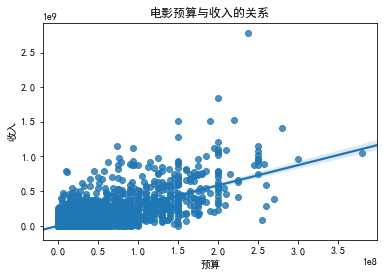

In [181]:
sns.regplot(full['budget'],full['revenue'])
plt.title('电影预算与收入的关系')
xlabel('预算')
ylabel('收入')
plt.show()

In [126]:
full['production_companies']

0       Ingenious Film Partners,Twentieth Century Fox ...
1       Walt Disney Pictures,Jerry Bruckheimer Films,S...
2                            Columbia Pictures,Danjaq,B24
3       Legendary Pictures,Warner Bros.,DC Entertainme...
4                                    Walt Disney Pictures
5       Columbia Pictures,Laura Ziskin Productions,Mar...
6       Walt Disney Pictures,Walt Disney Animation Stu...
7       Marvel Studios,Prime Focus,Revolution Sun Studios
8                               Warner Bros.,Heyday Films
9       DC Comics,Atlas Entertainment,Warner Bros.,DC ...
10      DC Comics,Legendary Pictures,Warner Bros.,Bad ...
11                                        Eon Productions
12      Walt Disney Pictures,Jerry Bruckheimer Films,S...
13      Walt Disney Pictures,Jerry Bruckheimer Films,I...
14      Legendary Pictures,Warner Bros.,DC Entertainme...
15      Walt Disney,Walden Media,Stillking Films,Ozumi...
16                      Paramount Pictures,Marvel Studios
17      Walt D

In [131]:
full['Universal Pictures']=full['production_companies'].str.contains('Universal Pictures').apply(lambda x:1 if x else 0)
full['Paramount Pictures']=full['production_companies'].str.contains('Paramount Pictures').apply(lambda x:1 if x else 0)
Universal_Pictures_total=full['Universal Pictures'].sum()
Paramount_Pictures_total=full['Paramount Pictures'].sum()
total_all=pd.Series({'Universal Pictures':Universal_Pictures_total,'Paramount Pictures':Paramount_Pictures_total})
total_all

Paramount Pictures    285
Universal Pictures    314
dtype: int64

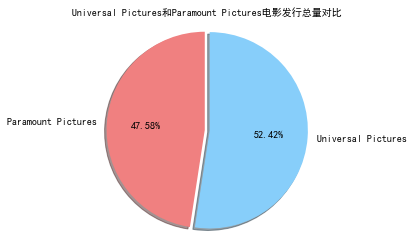

In [207]:
colors = ['lightcoral','lightskyblue']
total_all.plot(kind='pie',autopct='%1.2f%%',explode=(0.05,0),startangle=90,labeldistance=1.1,shadow=True,colors=colors)
plt.title('Universal Pictures和Paramount Pictures电影发行总量对比',fontsize=10)
plt.axis('equal')
plt.ylabel("")
plt.show()

In [171]:
full['profit']=full['revenue']-full['budget']
full['Universal_profit']=full['Universal Pictures']*full['profit']
full['Paramount_profit']=full['Paramount Pictures']*full['profit']
companyDf=full[['release_year','Universal Pictures','Paramount Pictures','Universal_profit',
              'Paramount_profit']]
companyDf.index=companyDf['release_year']
companyDf

,release_year,Universal Pictures,Paramount Pictures,Universal_profit,Paramount_profit
release_year,,,,,
2009,2009,0,0,0,0
2007,2007,0,0,0,0
2015,2015,0,0,0,0
2012,2012,0,0,0,0
2012,2012,0,0,0,0
2007,2007,0,0,0,0
2010,2010,0,0,0,0
2015,2015,0,0,0,0
2009,2009,0,0,0,0


In [174]:
companyDf=companyDf.sort_index()
companyDf

,release_year,Universal Pictures,Paramount Pictures,Universal_profit,Paramount_profit
release_year,,,,,
1916,1916,0,0,0,0
1925,1925,0,0,0,0
1927,1927,0,1,0,-91969578
1929,1929,0,0,0,0
1929,1929,0,0,0,0
1930,1930,0,0,0,0
1932,1932,0,1,0,21
1933,1933,0,1,0,2000000
1933,1933,0,0,0,0


In [175]:
companyDf=companyDf.groupby('release_year').sum()
companyDf

,Universal Pictures,Paramount Pictures,Universal_profit,Paramount_profit
release_year,,,,
1916,0,0,0,0
1925,0,0,0,0
1927,0,1,0,-91969578
1929,0,0,0,0
1930,0,0,0,0
1932,0,1,0,21
1933,0,1,0,2000000
1934,0,0,0,0
1935,0,0,0,0


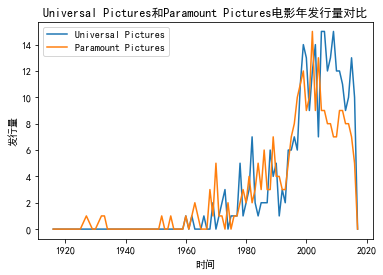

In [179]:
plt.plot(companyDf.index,companyDf['Universal Pictures'])
plt.plot(companyDf.index,companyDf['Paramount Pictures'])
plt.xlabel('时间')
plt.ylabel('发行量')
plt.title('Universal Pictures和Paramount Pictures电影年发行量对比')
plt.grid(False)
plt.legend()
plt.show()

In [182]:
full['Universal_profit']=full['Universal_profit'].sum()
full['Paramount_profit']=full['Paramount_profit'].sum()
Universal_profit=full['Universal_profit'].sum()
Paramount_profit=full['Paramount_profit'].sum()

In [185]:
profit_total=pd.Series({'Universal_profit':Universal_profit,'Paramount_profit':Paramount_profit})
profit_totalprofit_total.plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0),
                 startangle=90,labeldistance=1.1,shadow=False)
plt.title('Universal Pictures和Paramount Pictures的总利润对比',fontsize=10)
plt.show()profit_total.plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0),
                 startangle=90,labeldistance=1.1,shadow=False)
plt.title('Universal Pictures和Paramount Pictures的总利润对比',fontsize=10)
plt.show()

Paramount_profit    132413475488874
Universal_profit    139240644306588
dtype: int64

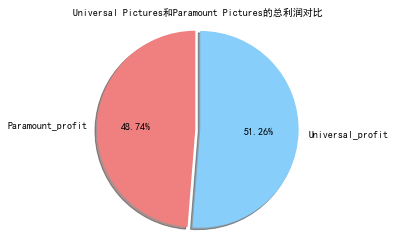

In [208]:
profit_total.plot(kind='pie',autopct='%1.2f%%',explode=(0.05,0),
                 startangle=90,labeldistance=1.1,shadow=True,colors=colors)
plt.title('Universal Pictures和Paramount Pictures的总利润对比',fontsize=10)
plt.axis('equal')
plt.ylabel("")
plt.show()

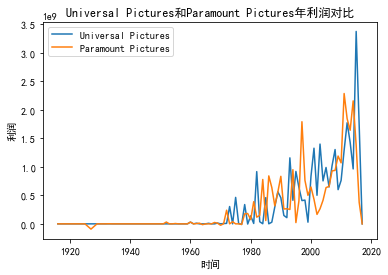

In [191]:
plt.plot(companyDf.index,companyDf['Universal_profit'],label='Universal Pictures')
plt.plot(companyDf.index,companyDf['Paramount_profit'],label='Paramount Pictures')
plt.xlabel('时间')
plt.ylabel('利润')
plt.title('Universal Pictures和Paramount Pictures年利润对比')
plt.grid(False)
plt.legend()
plt.show()

In [192]:
full['if_original']=full['keywords'].str.contains('based on novel').apply(lambda x:'not original' if x else 'original')
full['if_original']

0           original
1           original
2       not original
3           original
4       not original
5           original
6           original
7           original
8           original
9           original
10          original
11          original
12          original
13          original
14          original
15      not original
16          original
17          original
18          original
19          original
20          original
21          original
22          original
23          original
24          original
25          original
26          original
27          original
28          original
29          original
            ...     
4773        original
4774        original
4775        original
4776        original
4777        original
4778        original
4779        original
4780        original
4781        original
4782        original
4783        original
4784        original
4785        original
4786        original
4787        original
4788        original
4789        o

In [193]:
key_count=full['if_original'].value_counts()
key_count

original        4606
not original     197
Name: if_original, dtype: int64

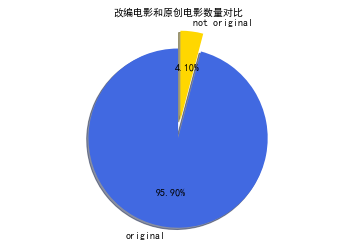

In [210]:
dcolors=['royalblue','gold']
key_count.plot(kind='pie',autopct='%1.2f%%',explode=(0.2,0),
                 startangle=90,labeldistance=1.1,shadow=True,colors=dcolors)
plt.title('改编电影和原创电影数量对比',fontsize=10)
plt.ylabel('')
plt.axis('equal')
plt.show()

In [201]:
original_total=full.groupby('if_original')['profit'].mean()
original_total

if_original
not original    9.848457e+07
original        5.127943e+07
Name: profit, dtype: float64

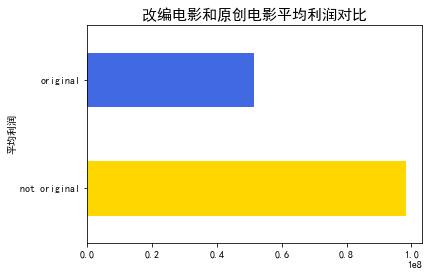

In [206]:
dcolors=['gold','royalblue']
original_total.plot(kind='barh',colors=dcolors)
plt.title('改编电影和原创电影平均利润对比',fontsize=15)
plt.ylabel('平均利润',fontsize=10)
plt.grid(False)
plt.xlabel('')
plt.show()